In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
pinkwink_web = pd.read_csv('https://raw.githubusercontent.com/rrkcl7733/DataScience/master/data/08.%20PinkWink%20Web%20Traffic.csv',
                          encoding='utf-8', thousands=',', names=['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.tail()

,hit
date,
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0
17. 6. 30.,1193.0


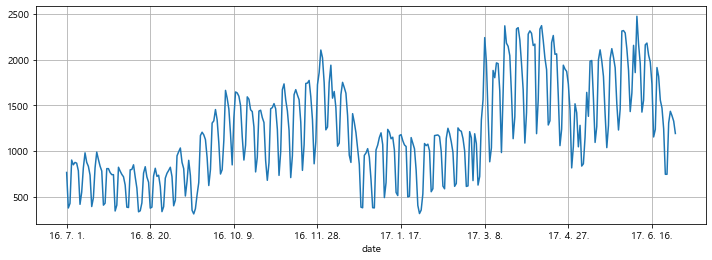

In [4]:
pinkwink_web['hit'].plot(figsize=(12, 4), grid=True);

In [8]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
df.drop('date', axis=1, inplace=True)
df.tail()

,ds,y
360,2017-06-26,1309.0
361,2017-06-27,1436.0
362,2017-06-28,1387.0
363,2017-06-29,1328.0
364,2017-06-30,1193.0


In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose    # 시계열 분해(tsa)

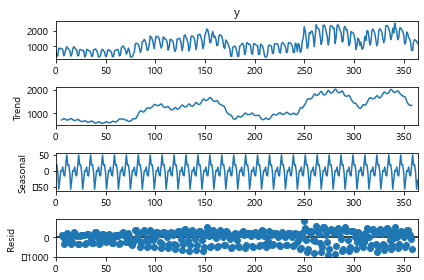

In [38]:
result = seasonal_decompose(df['y'], model='additive', freq=12)

result.plot();

### ACF 그래프 그려보기

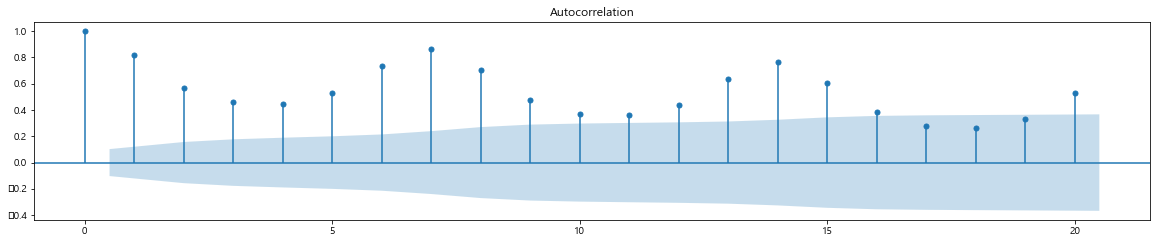

In [44]:
import statsmodels.api as sm

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(pinkwink_web, lags=20, ax=ax1);

In [50]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(pinkwink_web)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for k, v in result[4].items():
    print(f'\t{k}:  {v}')

ADF Statistic: -2.140493104133678
p-value: 0.22854679343573547
Critical Values:
	1%:  -3.4491725955218655
	5%:  -2.8698334971428574
	10%:  -2.5711883591836733


#### p-value > .05 이므로 정상성을 만족하지 못한다.

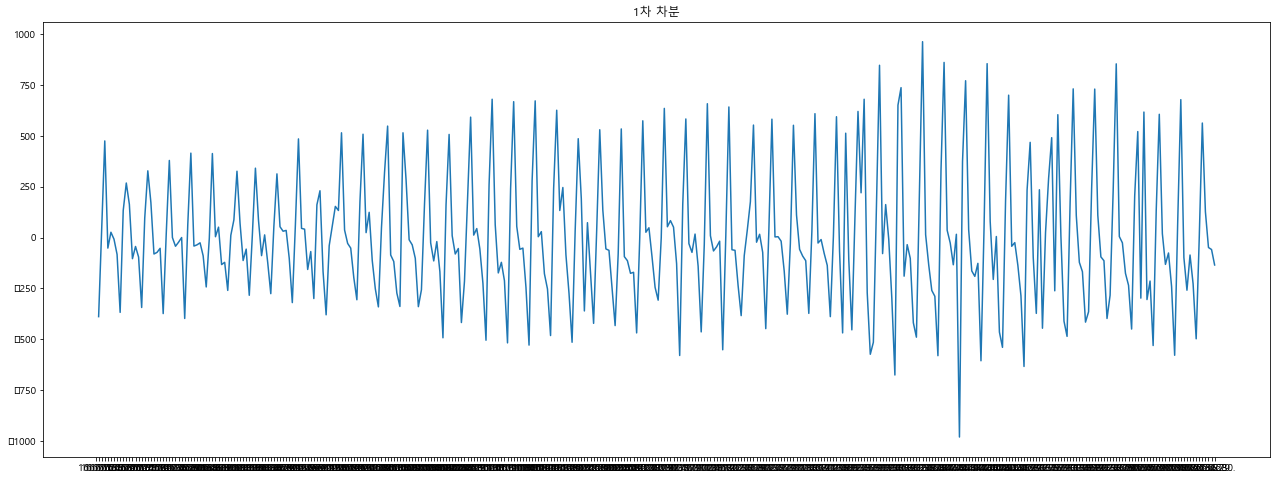

In [51]:
web_diff = pinkwink_web - pinkwink_web.shift()     # 1차 차분
plt.figure(figsize=(22, 8))
plt.plot(web_diff)
plt.title('1차 차분')
plt.show()

In [52]:
result = adfuller(web_diff[1:])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for k, v in result[4].items():
    print(f'\t{k}:  {v}')

ADF Statistic: -5.037474189170656
p-value: 1.8699454383291716e-05
Critical Values:
	1%:  -3.4491725955218655
	5%:  -2.8698334971428574
	10%:  -2.5711883591836733


#### p-value < .05 이므로 1차 차분 데이터는 정상성을 만족한다.